# Ebay Car Sales Data

In this project, I worked with a dataset of used cars from *eBay Kleinanzeigen*, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by user [orgesleka](https://www.kaggle.com/orgesleka).
The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

The aim of this project is to clean the data and answer the following questions:

1. What is the cheaper selling brand/model?
2. How much cheaper are cars with damage than their non-damaged counterparts?
3. What day of the week were more ads created?
4. Which brand/model, on average, has the highest mileage among the most frequent vehicles advertised on eBay?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
autos = pd.read_csv('autos.csv', encoding='Windows -1251')

In [3]:
# Functions

# frequency table with interval classes
def table_class_intervals(data, periods):
    intervals = np.arange(
        start = data.min() - 0.1,
        stop = data.max() + 0.1,
        step = (data.max() - data.min() + 0.1) /periods
    )
    
    return pd.cut(data, intervals).value_counts().sort_index()

---
## Dataset overview

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


---
### Cleaning Column Names

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

The columns are written in camelcase. They will be changed for title case.

In [6]:
new_columns = ['Date Crawled', 'Name', 'Seller', 'Offer Type', 'Price EUR', 'Abtest',
       'Vehicle Type', 'Registration Year', 'Gearbox', 'Power PS', 'Model',
       'Kilometer', 'Registration Month', 'Fuel Type', 'Brand',
       'Unrepaired Damage', 'Ad Created', 'Nr of Pictures', 'Postal Code',
       'Last Seen']

autos.columns = new_columns
autos.head()

,Date Crawled,Name,Seller,Offer Type,Price EUR,Abtest,Vehicle Type,Registration Year,Gearbox,Power PS,Model,Kilometer,Registration Month,Fuel Type,Brand,Unrepaired Damage,Ad Created,Nr of Pictures,Postal Code,Last Seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Changes

- "price" to "Price EUR" (assuming the currency is Euro)
- "yearOfRegistration" to "Registration Year".
- "monthOfRegistration" to "Registration Month".
- "notRepairedDamage" to "Unrepaired Damage".     
- "dateCreated" to "Ad Created".

---
### Dropping useless columns and null values

In [7]:
autos.describe(include='all')

,Date Crawled,Name,Seller,Offer Type,Price EUR,Abtest,Vehicle Type,Registration Year,Gearbox,Power PS,Model,Kilometer,Registration Month,Fuel Type,Brand,Unrepaired Damage,Ad Created,Nr of Pictures,Postal Code,Last Seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


The column names use camelcase. We will use title case.

In [8]:
autos['Nr of Pictures'].value_counts(dropna=False)

0    371528
Name: Nr of Pictures, dtype: int64

Columns "Seller", "Offer type" and "Nr of pictures" they have mosttly one value. We will drop of then.

The columns "Abtest", "Registration Year", "Gearbox", "Power PS", "Registration Month", "Fuel Type" and "Postal Code" are useless for our analysis. Therefore, they will also be discarded.

In [9]:
autos = autos.drop(['Date Crawled', 'Seller', 'Offer Type', 'Abtest', 'Registration Year', 'Gearbox', 'Power PS', 'Registration Month', 'Fuel Type', 'Nr of Pictures', 'Postal Code', 'Last Seen'], axis=1)
autos.head()

,Name,Price EUR,Vehicle Type,Model,Kilometer,Brand,Unrepaired Damage,Ad Created
0,Golf_3_1.6,480,NaN,golf,150000,volkswagen,NaN,2016-03-24 00:00:00
1,A5_Sportback_2.7_Tdi,18300,coupe,NaN,125000,audi,ja,2016-03-24 00:00:00
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,grand,125000,jeep,NaN,2016-03-14 00:00:00
3,GOLF_4_1_4__3TЬRER,1500,kleinwagen,golf,150000,volkswagen,nein,2016-03-17 00:00:00
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,fabia,90000,skoda,nein,2016-03-31 00:00:00


In [10]:
# percentage of null values in each column
autos.isnull().sum() / autos.shape[0]

Name                 0.000000
Price EUR            0.000000
Vehicle Type         0.101928
Model                0.055134
Kilometer            0.000000
Brand                0.000000
Unrepaired Damage    0.193956
Ad Created           0.000000
dtype: float64

Some columns have null values, but none have more than ~20% null values. Let's check if the columns "Vehicle Type", "Model" and "Unrepaired Damage" contain null values in common.

In [11]:
bool_null = autos['Vehicle Type'].isnull() & autos['Model'].isnull() & autos['Unrepaired Damage'].isnull()
autos[bool_null].shape[0] / autos.shape[0]

0.012195581490493315

We see that about 1% of the lines have null values in the "Vehicle type", "Model", "Fuel type" and "Unrepaired" columns. We will eliminate these lines.

In [12]:
autos = autos[~bool_null]

Now we’ll see the total rows with null values.

In [13]:
bool_null = autos['Vehicle Type'].isnull() | autos['Model'].isnull() | autos['Unrepaired Damage'].isnull()
autos[bool_null].shape[0] / autos.shape[0]

0.2549666618528217

About 25% of all lines contain null values. removing them would correspond to a great loss of data. For that reason, we will keep them for now.

We will clean up all the columns. The process will be performed by cleaning the columns in the following order:

- "Name", "Model" and "Brand" columns
- "Price EUR" and "Kilometer" columns
- "Ad Created" column
- "Vehicle Type", "Fuel Type" and "Unrepaired Damage" columns

---
## Clearing "Name", "Model" and "Brand" columns

### "Name" column

We will not use the "Name" column directly in our analysis. However, we will keep it because it can be useful to assist in analyzes involving the car model / brand.

In [14]:
# using lower case
autos['Name'] = autos['Name'].str.lower().str.strip()
autos['Name'].value_counts().sort_values(ascending=False).head(20)

opel_corsa             795
ford_fiesta            764
bmw_318i               629
volkswagen_golf_1.4    605
renault_twingo         571
bmw_316i               525
opel_corsa_b           521
volkswagen_polo        493
bmw_320i               493
opel_astra             451
ford_focus             446
volkswagen_golf        437
volkswagen_polo_1.2    415
volkswagen_golf_1.6    413
bmw_116i               395
opel_corsa_1.2_16v     378
peugeot_206            371
fiat_punto             360
opel_corsa_1.0_12v     351
renault_twingo_1.2     333
Name: Name, dtype: int64

It appears that some of the entries in "Names" begin with the brand. We will extract the initial word in the "Name" column and compare it with the "Brand" column. When they match, we'll remove the initial word from the car's name.

In [15]:
# removing the brand in the "name" column
names_brand = autos['Name'].str.split('_').str[0].str.lower()
autos['Brand'] = autos['Brand'].str.lower().str.strip()

bool_names_brands = names_brand == autos['Brand']

autos.loc[bool_names_brands, 'Name'] = autos.loc[bool_names_brands, 'Name'].str.split('_').str[1:].str.join('_')

In [16]:
autos['Name'].value_counts().sort_values(ascending=False).head(30)

corsa                     794
fiesta                    765
318i                      629
golf_1.4                  606
twingo                    572
316i                      525
corsa_b                   521
polo                      494
320i                      493
astra                     450
focus                     446
golf                      438
polo_1.2                  416
zu_verkaufen              413
golf_1.6                  413
116i                      395
corsa_1.2_16v             378
206                       369
punto                     360
corsa_1.0_12v             352
twingo_1.2                340
vw_polo_6n                317
clio                      292
golf_1.9_tdi              278
passat_variant_1.9_tdi    277
astra_1.6                 273
corsa_c                   260
a4_avant_2.0_tdi_dpf      255
318i_touring              254
mini_cooper               249
Name: Name, dtype: int64

In [17]:
autos['Name'].describe()

count     366997
unique    219766
top        corsa
freq         794
Name: Name, dtype: object

Still has a lot of unique values. We can remove the lines that have "zu_verkaufen" in the "Name" column.

In [18]:
bool_zv = autos['Name'] != "zu_verkaufen"
autos = autos[bool_zv]

In [19]:
autos['Name'].value_counts().sort_index(ascending=False).head(10)

•••••••vw_polo_6n•••••••1_4_l•••••••••                               1
•••ford_galaxy_tьv_neu•••                                            1
•••_top_twingo__c06__•••_54.100km_•••                                1
••_vw_golf_5_united_••_1_9_tdi_105_ps_tьv/au_02.17                   1
•renault_megane•_tausch_auch_moeglich                                1
•peugeot_206+_*modell_2010*_vb!!!75ps                                1
•nissan_almera_tьv_2017_tuning_hifi/sportauspuff/8_fachbereift!!!    1
•_zuverlaessiges_auto_vom_kfz_mechatroniker_zu_verkaufen_•           1
•_polo_6n_•_tьv/au_neu_•_3.hand_•_viele_extras.._•                   1
•_bmw_116i__tausch_oder_verkauf_•                                    1
Name: Name, dtype: int64

In the "Name" column there are many different entries that symbolize the same car. There is no a clear pattern in car names. Clearing all of that data would make this notebook boring to read. An alternative is to consider the values most frequently occur as a sample of all the names of cars if needed.

### "Model" column

In [20]:
autos['Model'].isnull().sum() / autos.shape[0]

0.043403421862383516

Around 4% of the values in the "Brand" column are null values. We will investigate these values further. 

In [21]:
autos.loc[autos['Model'].isnull(), 'Name'].describe()

count         15911
unique        13642
top       dodge_ram
freq             48
Name: Name, dtype: object

As most of the elements in the "Names" column contain the model, we could extract these models and assign the "Model" column. However, due to the great variety of elements in "Names", this task becomes too tiring. For this reason we will keep the values.

In [22]:
autos['Model'].value_counts(normalize=True).sort_values(ascending=False).head(60)

golf           0.085704
andere         0.075175
3er            0.058610
polo           0.037303
corsa          0.035805
astra          0.030844
passat         0.029364
a4             0.029212
c_klasse       0.025015
5er            0.024345
e_klasse       0.021553
a3             0.018827
a6             0.017153
focus          0.016947
fiesta         0.016451
transporter    0.015758
twingo         0.014113
2_reihe        0.013722
fortwo         0.012331
a_klasse       0.012291
vectra         0.012100
1er            0.010939
mondeo         0.010317
clio           0.010106
touran         0.010092
3_reihe        0.009967
punto          0.009527
zafira         0.008692
megane         0.008335
ibiza          0.007702
ka             0.007699
lupo           0.007394
x_reihe        0.006576
octavia        0.006251
cooper         0.006054
fabia          0.005929
clk            0.005284
micra          0.004999
caddy          0.004697
80             0.004571
sharan         0.004431
scenic         0

In [24]:
autos['Model'].value_counts(normalize=True).sort_values(ascending=False).head(60).sum()

0.8179044294827374

The 60 most frequent models correspond to more than 80% of the data. Most of the data is ok. However some words are in German. We do don't need to translate all because in question 4 we will deal with the most frequent ones. We will check only the 10 most frequent ones.

In [71]:
autos['Model'].value_counts(normalize=True).sort_values(ascending=False).head(15)

golf        0.084962
other       0.074981
3_series    0.058376
polo        0.036953
corsa       0.035619
astra       0.030647
a4          0.029191
passat      0.029188
c_class     0.025241
5_series    0.024361
e_klasse    0.021642
a3          0.019020
a6          0.017076
focus       0.017009
fiesta      0.016520
Name: Model, dtype: float64

In [73]:
autos['Model'].replace({'andere':'other', '3er':'3_series', 'c_klasse':'c_class', '5er':'5_series', 'e_klasse':'e_class'}, inplace=True)

### "Brand" column

In [25]:
autos['Brand'].value_counts().sort_index()

alfa_romeo         2309
audi              32563
bmw               39801
chevrolet          1819
chrysler           1434
citroen            5113
dacia               896
daewoo              526
daihatsu            795
fiat               9543
ford              25317
honda              2801
hyundai            3607
jaguar              620
jeep                801
kia                2540
lada                222
lancia              480
land_rover          770
mazda              5585
mercedes_benz     35022
mini               3377
mitsubishi         3033
nissan             4989
opel              39687
peugeot           10843
porsche            2193
renault           17795
rover               473
saab                529
seat               6953
skoda              5621
smart              5162
sonstige_autos     3108
subaru              764
suzuki             2300
toyota             4652
trabant             533
volkswagen        78707
volvo              3301
Name: Brand, dtype: int64

In [26]:
# rename "rover" to "land_rover"
autos['Brand'] = autos['Brand'].replace('rover', 'land_rover')

The column looks ok.

---
## Clearing "Price EUR" and "Kilometer" columns

### "Price EUR" column

In [27]:
autos['Price EUR'].describe()

count    3.665840e+05
mean     1.700470e+04
std      3.607970e+06
min      0.000000e+00
25%      1.199000e+03
50%      2.999000e+03
75%      7.299000e+03
max      2.147484e+09
Name: Price EUR, dtype: float64

We will group the price in intervals.

In [28]:
autos['Price EUR'].value_counts().sort_index(ascending=False).head(15)

2147483647     1
99999999      14
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       8
11111111       6
10000000       7
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
Name: Price EUR, dtype: int64

Given that eBay is an auction site, there could legitimately be items where the opening bid is EUR 1. We will keep the EUR 1 items for now. Prices over EUR 10000000 looks unrealistics for eBay  

In [29]:
autos = autos[autos['Price EUR'].between(1,10000000)]

In [30]:
table_class_intervals(autos['Price EUR'], 10)

(0.9, 1000000.81]           356769
(1000000.81, 2000000.72]         9
(2000000.72, 3000000.63]         2
(3000000.63, 4000000.54]         2
(4000000.54, 5000000.45]         0
(5000000.45, 6000000.36]         0
(6000000.36, 7000000.27]         0
(7000000.27, 8000000.18]         0
(8000000.18, 9000000.09]         0
(9000000.09, 10000000.0]        10
Name: Price EUR, dtype: int64

We will also remove anything above EUR 400,000, since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [31]:
autos = autos[autos['Price EUR'].between(1,4000000)]

In [32]:
table_class_intervals(autos['Price EUR'], 10)

(0.9, 389500.81]            356727
(389500.81, 779000.72]          24
(779000.72, 1168500.63]         21
(1168500.63, 1558000.54]         4
(1558000.54, 1947500.45]         2
(1947500.45, 2337000.36]         0
(2337000.36, 2726500.27]         0
(2726500.27, 3116000.18]         2
(3116000.18, 3505500.09]         0
(3505500.09, 3895000.0]          2
Name: Price EUR, dtype: int64

Let's look more deeply for the price in the range (0.9, 40000]. 

In [33]:
table_class_intervals(autos.loc[autos['Price EUR'] <= 40000, 'Price EUR'], 10)

(0.9, 4000.81]          207892
(4000.81, 8000.72]       68269
(8000.72, 12000.63]      33136
(12000.63, 16000.54]     19273
(16000.54, 20000.45]     11165
(20000.45, 24000.36]      5686
(24000.36, 28000.27]      4045
(28000.27, 32000.18]      2231
(32000.18, 36000.09]      1472
(36000.09, 40000.0]        959
Name: Price EUR, dtype: int64

We can see that the price is mostly concentrated in the range (0.9, 40000].

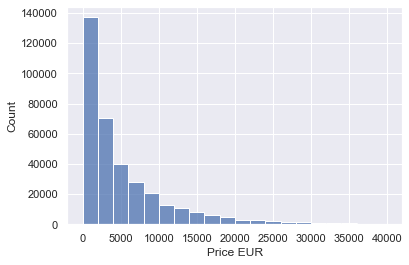

In [34]:
sns.set_theme(style="darkgrid")
sns.histplot(data=autos.loc[autos['Price EUR'].between(1,40000)], x='Price EUR', bins=20)
# plt.hist(autos.loc[autos['Price EUR'].between(1,40000), 'Price EUR'], bins=20)
plt.show()

The Price EUR column looks ok now. The "Price EUR" distribution concentrates on the lowest values as we can see in the histogram.

### "Kilometer" column

In [35]:
autos['Kilometer'].value_counts().sort_index()

5000        5547
10000       1829
20000       5453
30000       5902
40000       6292
50000       7489
60000       8545
70000       9629
80000      10857
90000      12291
100000     15309
125000     37118
150000    230521
Name: Kilometer, dtype: int64

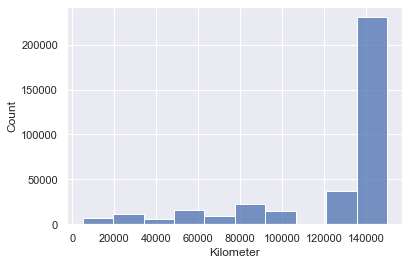

In [36]:
sns.histplot(data=autos, x='Kilometer', bins=10)
plt.show()

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field.  Additionally, there are more high mileage than low mileage vehicles.  

---
## Clearing "Ad Created" column

In [37]:
autos['Ad Created'].head()

0    2016-03-24 00:00:00
1    2016-03-24 00:00:00
2    2016-03-14 00:00:00
3    2016-03-17 00:00:00
4    2016-03-31 00:00:00
Name: Ad Created, dtype: object

It appears the date format in "Ad created" column is in "yyyy-mm-dd hh:mm:ss" format. We will use regular expressions to verify the format.

In [38]:
pattern = r'^2016-0[3-4]-(?:[0-2][0-9]|3[0-1]) (?:[0-1][0-9]|2[0-3]):[0-5][0-9]:[0-5][0-9]$'

bool(autos['Ad Created'].str.contains(pattern).shape[0] == autos.shape[0])

True

Since the number of matches are the same of the number of rows we can conclude that all the entries in "Date crawled" column are in "yyyy-mm-dd hh:mm:ss" format. Also they range from March to April 2016.

In [39]:
# convert to datetime
autos['Ad Created'] = pd.to_datetime(autos['Ad Created'])

## Clearing "Unrepaired Damage" column

In these columns we have to translate some words from German to English.

In [40]:
autos['Vehicle Type'].value_counts(dropna=False, normalize=True)

limousine     0.262765
kleinwagen    0.218921
kombi         0.185065
NaN           0.085456
bus           0.083370
cabrio        0.063221
coupe         0.051774
suv           0.040619
andere        0.008809
Name: Vehicle Type, dtype: float64

In [41]:
# translate
autos['Vehicle Type'].replace({'kleinwagen': 'small_car', 'cabrio':'convertible', 'andere':'other'}, inplace=True)

### "Unrepaired Damage" column

In [42]:
autos['Unrepaired Damage'].value_counts(dropna=False, normalize=True)

nein    0.727402
NaN     0.176719
ja      0.095879
Name: Unrepaired Damage, dtype: float64

In [43]:
# translate
autos['Unrepaired Damage'].replace({'nein': 'no', 'ja':'yes'}, inplace=True)

In [44]:
autos['Unrepaired Damage'].value_counts(dropna=False, normalize=True)

no     0.727402
NaN    0.176719
yes    0.095879
Name: Unrepaired Damage, dtype: float64

---
## Question 1: What is the cheaper selling brand/model?

The Mean can be afected auction mode on eBay. In this case, we considere only values over 100 EUR. We will calculare the Mean and the Median for each model and compare. 

In [45]:
# table with the mean for each brand/model
pivot_table = pd.pivot_table(autos[autos['Price EUR']>=100], index=['Brand', 'Model'], values='Price EUR', aggfunc=[np.mean])
pivot_table.head()

mean
                     Price EUR
Brand      Model              
alfa_romeo 145      917.545455
           147     2315.167558
           156     1603.193603
           159     7231.521739
           andere  7193.013592

In [46]:
pivot_table.sort_values(by=pivot_table.columns[0]).head()

,,mean
,,Price EUR
Brand,Model,
lancia,elefantino,566.900000
daewoo,lanos,623.197674
daihatsu,move,726.140000
lada,samara,795.000000
mazda,1_reihe,796.357895


In [47]:
autos.loc[autos['Price EUR']>=100, 'Price EUR'].mean()

6130.982686937636

As we can see "elefantino/lancia" is the cheapest model. As a comparative, the mean price of all car is 6121.97 EUR.

---
## Question 2: How much cheaper are cars with damage than their non-damaged counterparts?

Again, we considere price over 100 EUR to avoid extreme values.

In [48]:
damaged = autos[autos['Unrepaired Damage']=='yes'] 
damaged.loc[damaged['Price EUR']>=100, 'Price EUR'].mean()

2350.8322091813993

In [49]:
undamaged = autos[autos['Unrepaired Damage']=='no']
undamaged.loc[undamaged['Price EUR']>=100, 'Price EUR'].mean()

7258.267467805194

Undamaged cars are around three times more expensive than damaged cars.

---
## Question 3: Which car brand takes the longest to sell?

In [50]:
df = pd.DataFrame({'Ad Created': autos['Ad Created'], 'Week Days': autos['Ad Created'].dt.dayofweek})
df['Week Days'].replace({0:'MON', 1:'TUE', 2:'WED', 3: 'THU', 4: 'FRI', 5: 'SAT', 6: 'SUN'}, inplace=True)
df

,Ad Created,Week Days
0,2016-03-24,THU
1,2016-03-24,THU
2,2016-03-14,MON
3,2016-03-17,THU
4,2016-03-31,THU
...,...,...
371521,2016-03-27,SUN
371524,2016-03-05,SAT
371525,2016-03-19,SAT
371526,2016-03-20,SUN


In [51]:
df['Week Days'].value_counts()

MON    63756
SAT    57277
TUE    51710
SUN    49362
WED    47604
THU    45835
FRI    41238
Name: Week Days, dtype: int64

The most frequent ad creation day is Monday

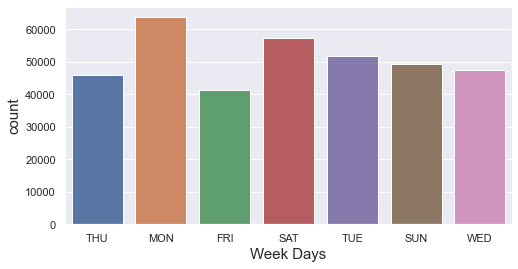

In [52]:
ax, fig = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='Week Days', data=df)
ax.set_ylabel('count', fontsize=15)
ax.set_xlabel('Week Days', fontsize=15)
plt.show()

---
## Question 4: Which brand/model, on average, has the highest mileage among the most frequent vehicles advertised on eBay?

We will consider for our analysis only the 10 most frequent car advertised on eBay.

In [76]:
autos['Model'].value_counts(ascending=False).head(10)

golf        29062
other       25648
3_series    19968
polo        12640
corsa       12184
astra       10483
a4           9985
passat       9984
c_class      8634
5_series     8333
Name: Model, dtype: int64

Note that "other" is not a valid tag. So we will not consider it in our analysis.

In [78]:
top_ten = autos.loc[autos['Model']!='other', 'Model'].value_counts(ascending=False).head(10).index
top_ten

Index(['golf', '3_series', 'polo', 'corsa', 'astra', 'a4', 'passat', 'c_class',
       '5_series', 'e_class'],
      dtype='object')

In [80]:
# DataSet with the 50 most frequent car names
autos_top_ten = autos[autos['Model'].isin(top_ten)]

In [81]:
pivot_table = pd.pivot_table(autos_top_ten, index=['Brand', 'Model'], values='Kilometer', aggfunc=[np.mean])
pivot_table.sort_values(by=pivot_table.columns[0], ascending=False).head(20)

mean
                            Kilometer
Brand         Model                  
bmw           5_series  141425.057002
volkswagen    passat    139877.303686
bmw           3_series  138155.799279
audi          a4        138025.538307
mercedes_benz e_class   136906.659462
              c_class   131550.266389
opel          astra     131207.669560
volkswagen    golf      127923.921272
              polo      127659.018987
opel          corsa     127306.303349

We conclude that the BMW 5 Series is the model that is advertised with the highest mileage on average.